In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

C:\Users\User\anaconda3\envs\py3iaml\lib\site-packages\sklearn\utils\__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Sequence


In [2]:
df = pd.read_csv("data/regression_part2.csv")

In [3]:
df.head()

,input,output
0,2.728,9.088
1,3.244,12.786
2,-4.164,-10.016
3,4.875,32.976
4,3.329,10.437


In [4]:
models = []

xplot = np.linspace(-5, 5, 500).reshape(-1, 1)

y = df.output
for M in range(1, 5):
    poly = PolynomialFeatures(degree = M)
    X = poly.fit_transform(np.array(df.input).reshape(-1, 1))
    plottingvals = (poly.fit_transform(xplot))
    
    model = LinearRegression(fit_intercept = False)
    model.fit(X, y)
    print(model.coef_)
    models.append((model, X, plottingvals, M))

[3.07542413 3.46412862]
[-1.26620028  3.46985973  0.39506553]
[0.4053055  0.48562415 0.31115341 0.19142221]
[ 0.24292578  0.48100068  0.35212378  0.19152571 -0.00169485]


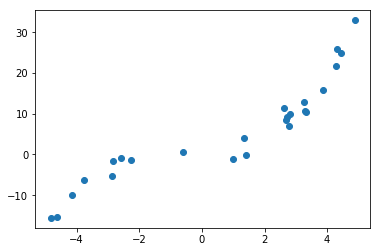

In [5]:
plt.scatter(df.input, df.output)

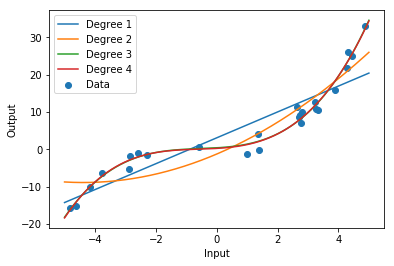

In [6]:
for m, X, xvals, deg in models:
    plt.plot(xplot, m.predict(xvals), label = f"Degree {deg}")
    
plt.scatter(df.input, df.output, label = "Data")

plt.xlabel("Input")
plt.ylabel("Output")
plt.legend()

In [7]:
from sklearn.metrics import mean_squared_error

mses = [mean_squared_error(df.output, m.predict(X)) for m, X, xvals, deg in models]

Text(0,0.5,'Mean Squared Error')

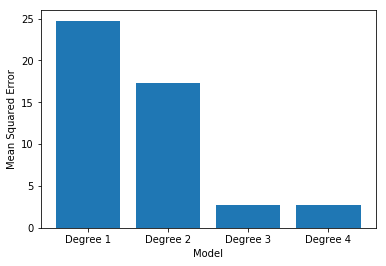

In [8]:
plt.bar([f"Degree {d}" for d in range(1, 5)], mses)
plt.xlabel("Model")
plt.ylabel("Mean Squared Error")

In [9]:
mses[2:]

[2.7447567192524276, 2.7389111790755383]

In [10]:
def rbf_transform(x, cs, alpha):
    def rbf(x, c, alpha):
        return np.exp(-0.5 * ((x-c)**2) /(alpha**2))
    out = [1, ]
    for c in cs:
        out.append(rbf(x, c, alpha))
    return np.array(out)

In [11]:
C = [-4, -2, 2, 4]
alphas = [0.2, 100, 1000]

In [12]:
# [(X_train, X_plot),]
model_data = []

for a in alphas:
    X_train = list(df.input.map(lambda x: rbf_transform(x, C, a)))
    X_plot = np.apply_along_axis(lambda x: rbf_transform(x, C, a), 1, xplot)
    model_data.append((X_train, X_plot))

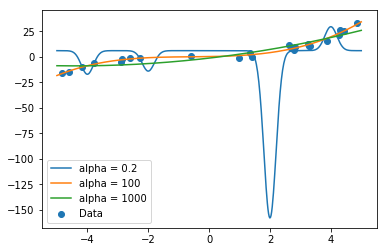

In [13]:
for i in range(3):
    model = LinearRegression(fit_intercept = False)
    model.fit(model_data[i][0], df.output)
    
    plt.plot(xplot, model.predict(model_data[i][1]), label = f"alpha = {alphas[i]}")

plt.scatter(df.input, df.output, label = "Data")
plt.legend()